Bu projemizde belirli bir beton karışımı ve kürlenme süresi için basınç dayanımını tahmin eden bir makine öğrenimi modeli geliştireceğiz.(Regression)

These data were downloaded from the UCI Machine Learning Repository  

<a href='https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength' target=_blank> Data dosyasını buradaki linkten indirebilirsiniz.

The original source of the data is:  I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

# Gerekli importları yapıyoruz

In [64]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import r2_score, mean_squared_error

# Dosyamızı okuyoruz

In [23]:
df=pd.read_excel("Concrete_Data.xls")

In [24]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# EDA - Exploratory Data Analysis

In [25]:
df.shape

(1030, 9)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [27]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [28]:
df.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


# Sütun isimlerini güncelliyoruz

In [29]:
df.columns = ['Cement', 'Slag', 'FlyAsh', 'Water', 'Plasticizer',  'CoarseAgg', 'FineAgg', 'Age', 'Strength']

# verilerimizi x ve y olarak ayırıyoruz

In [30]:
x=df.drop('Strength', axis=1)
y=df['Strength']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20,random_state=42)

# verimizi standart hale getiriyoruz

In [33]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# modelimizi oluşturuyoruz 

In [38]:
model=Sequential()
model.add(Dense(30,activation='relu')) 
model.add(Dense(20,activation='relu')) 
model.add(Dense(10,activation='relu')) 
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam') 

In [39]:
history=model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size=128,epochs=1500,verbose=0)

In [40]:
tahmin=model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [50]:
r2=r2_score(y_test,tahmin)
r2

0.8814557195923036

In [51]:
rmse=mean_squared_error(y_test,tahmin)**.5
rmse

5.526899597672502

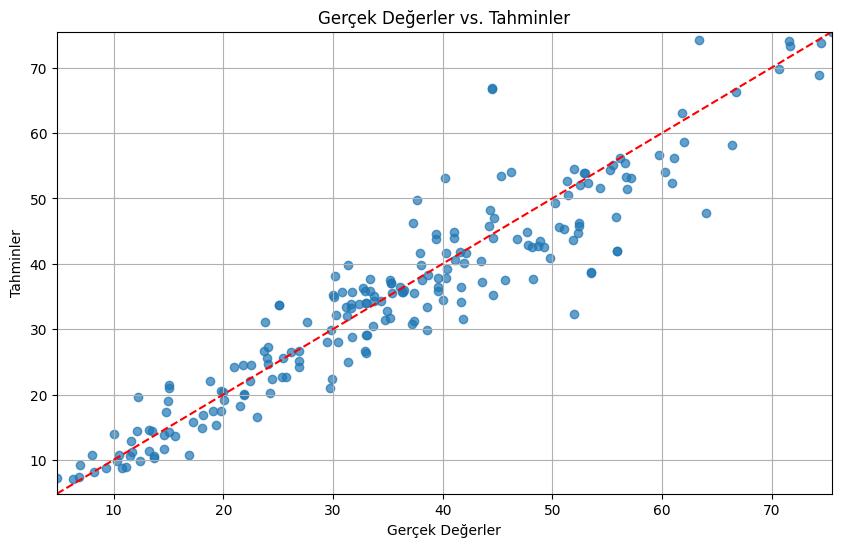

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, tahmin, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Gerçek Değerler vs. Tahminler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahminler')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

# Sonuç